In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
traj_path = '/common/home/st1122/Projects/safe-control-gym/quad_2d_test/trajectories'

files = os.listdir(traj_path)

traj_data = []

for file in tqdm(files):
    traj_data.append(np.loadtxt(os.path.join(traj_path, file), delimiter=','))


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:02<00:00, 1726.15it/s]


In [ ]:
for traj in traj_data:
    plt.scatter(traj[0, 0], traj[0, 2], c='red', label='Initial State')
    plt.scatter(traj[-1, 0], traj[-1, 2], c='green', label='Final State')
    plt.plot(traj[:, 0], traj[:, 2])


plt.show()

KeyboardInterrupt: 

In [3]:
success_trajs = []
failure_trajs = []

for traj in tqdm(traj_data):
    if np.linalg.norm(traj[-1] - np.array([0, 0, 1, 0, 0, 0])) < 0.1:
        success_trajs.append(traj)
    else:
        failure_trajs.append(traj)

100%|██████████| 5000/5000 [00:00<00:00, 78788.17it/s]


In [4]:
success_states = []
failure_states = []

for traj in success_trajs:
    success_states.append(traj[0])
for traj in failure_trajs:
    failure_states.append(traj[0])

success_states = np.array(success_states)
failure_states = np.array(failure_states)

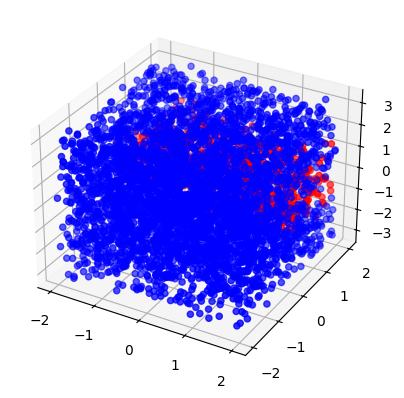

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(success_states[:, 0], success_states[:, 2], success_states[:, 4], c='red', label='Success States')
ax.scatter(failure_states[:, 0], failure_states[:, 2], failure_states[:, 4], c='blue', label='Failure States')
plt.show()



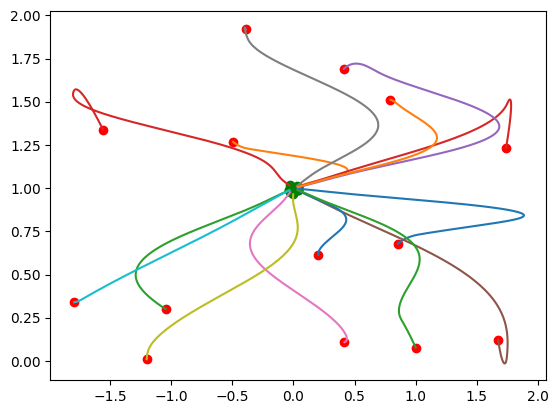

In [ ]:
for traj in tqdm(success_trajs):
    plt.scatter(traj[0, 0], traj[0, 2], c='red', label='Initial State')
    plt.scatter(traj[-1, 0], traj[-1, 2], c='green', label='Final State')
    plt.plot(traj[:, 0], traj[:, 2])


plt.show()

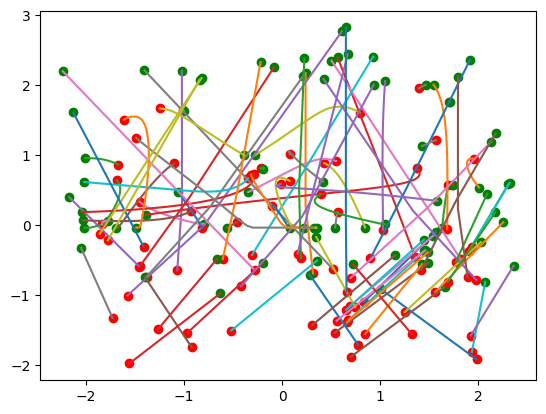

In [13]:
for traj in failure_trajs:
    plt.scatter(traj[0, 0], traj[0, 2], c='red', label='Initial State')
    plt.scatter(traj[-1, 0], traj[-1, 2], c='green', label='Final State')
    plt.plot(traj[:, 0], traj[:, 2])


plt.show()

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=success_states[:, 0],
        y=success_states[:, 2],
        z=success_states[:, 4],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.7),
        name='Success States',
    )
)
fig.add_trace(
    go.Scatter3d(
        x=failure_states[:, 0],
        y=failure_states[:, 2],
        z=failure_states[:, 4],
        mode='markers',
        marker=dict(size=3, color='blue', opacity=0.7),
        name='Failure States',
    )
)
fig.update_layout(
    title='Initial States (Interactive 3D)',
    scene=dict(
        xaxis_title='x0',
        yaxis_title='x2',
        zaxis_title='x4',
        aspectmode='cube',
    ),
    legend=dict(title='Outcome'),
    margin=dict(l=0, r=0, b=0, t=40),
)
fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed